In [15]:
# 1. 环境与依赖
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils.scaler import MinMaxScaler
from dataset import VerdictDataset, get_dataloaders

In [16]:
torch.cuda.is_available()

True

In [17]:
# 2. 设置参数与路径
mat_path = "D:/AiProjects/UCLmaster/dlfitting_verdict/VERDICT_training/AS_Z_fixdv/TrainingSet.mat" 
scaler_path = "D:/AiProjects/UCLmaster/dlfitting_verdict/checkpoints/mlp_minmaxscaler.pkl"          # 可选：保存/加载 scaler 的路径
batch_size = 32

In [ ]:
from scipy.io import loadmat

data = loadmat(mat_path)

print("Var：")
for name in data.keys():
    if not name.startswith("__"):
        print("  -", name)

Var：
  - database_train
  - database_train_noisy
  - params_train


In [19]:
from scipy.io import whosmat, loadmat
# 1. 列出文件里所有变量的名字、shape 和类型
info = whosmat(mat_path)
print("Variables Info：")
for name, shape, dtype in info:
    print(f"  • {name}: shape={shape}, type={dtype}")

data = loadmat(mat_path, struct_as_record=False, squeeze_me=True)
for name in ["database_train", "database_train_noisy", "params_train"]:
    var = data[name]
    print(f"\nVariable {name}:")
    print("  · Python Typr：", type(var))
    try:
        print("  · ndarray shape:", var.shape)
        print("  · dtype:", var.dtype)
    except:
        pass

    if hasattr(var, "dtype") and var.dtype.names:
        print("  · Name：", var.dtype.names)

Variables Info：
  • database_train: shape=(1000000, 153), type=double
  • database_train_noisy: shape=(1000000, 153), type=double
  • params_train: shape=(1000000, 8), type=double

Variable database_train:
  · Python Typr： <class 'numpy.ndarray'>
  · ndarray shape: (1000000, 153)
  · dtype: float64

Variable database_train_noisy:
  · Python Typr： <class 'numpy.ndarray'>
  · ndarray shape: (1000000, 153)
  · dtype: float64

Variable params_train:
  · Python Typr： <class 'numpy.ndarray'>
  · ndarray shape: (1000000, 8)
  · dtype: float64


In [20]:
train_loader, val_loader = get_dataloaders(
    mat_path=mat_path,
    batch_size=batch_size,
    train_ratio=0.8,
    seed=42,
    scaler_path=scaler_path
)

In [9]:
# 4. 查看一个 Batch 的内容
for X_batch, y_batch in train_loader:
    print("Input X shape:", X_batch.shape)
    print("Target y shape:", y_batch.shape)
    print("Sample X[0]:", X_batch[0])
    print("Sample y[0]:", y_batch[0])
    break


Input X shape: torch.Size([32, 153])
Target y shape: torch.Size([32, 8])
Sample X[0]: tensor([0.9573, 1.0184, 0.9650, 1.0590, 0.9739, 0.9970, 0.9597, 0.9806, 0.9372,
        0.9958, 0.9520, 1.0144, 0.9635, 0.8949, 0.9834, 0.9746, 0.9673, 0.9557,
        0.9339, 0.9899, 0.9108, 0.9024, 0.8934, 0.9914, 0.9017, 0.9065, 0.9386,
        1.0469, 0.8930, 0.8899, 0.8680, 1.0467, 0.9198, 0.9194, 0.8860, 1.0133,
        0.9147, 0.9096, 0.9121, 0.9837, 0.8815, 0.9790, 0.9178, 0.8512, 0.9227,
        0.8763, 0.8456, 0.9000, 0.8976, 0.8812, 0.8993, 0.9218, 0.8765, 0.8921,
        0.8600, 0.8746, 0.8704, 0.9124, 0.8416, 0.8963, 0.8167, 0.9013, 0.9151,
        0.9061, 0.8588, 0.8759, 0.9080, 0.8875, 0.8714, 0.8368, 0.9021, 0.8748,
        0.9762, 0.9170, 0.9383, 0.8768, 0.8987, 0.8817, 0.9369, 0.9148, 0.9293,
        0.8564, 0.9052, 0.8720, 0.8916, 0.9016, 0.9071, 0.8621, 0.8676, 0.8976,
        0.9009, 0.8686, 0.8923, 0.8570, 0.9090, 0.8642, 0.8829, 0.9087, 0.8630,
        0.8768, 0.8369, 0.8799, 0.

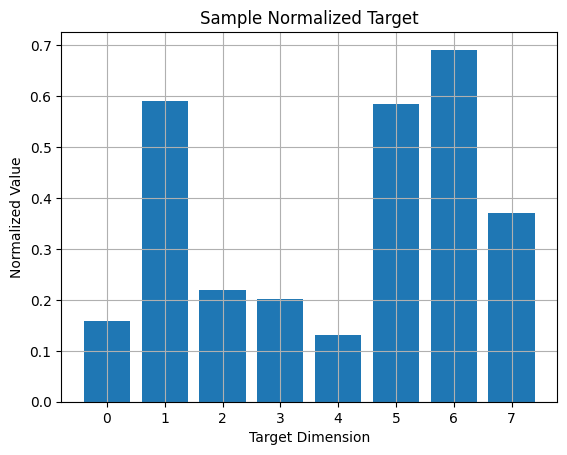

In [12]:
# 6. 可视化目标标签（如果是多维回归，也可以单独画出每一维）
sample_y = y_batch[0].numpy()
plt.bar(np.arange(len(sample_y)), sample_y)
plt.title("Sample Normalized Target")
plt.xlabel("Target Dimension")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.show()


In [21]:
len(train_loader)


25000

In [22]:
len(val_loader)

6250

In [25]:
len(train_loader) * batch_size + len(val_loader) * batch_size

1000000